### 작업환경 설정

In [ ]:
# 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 작업 파일 이동

HOME = '/content/drive/MyDrive/20240529'

import os
%cd {HOME}

### 데이터 불러오기

In [ ]:
# 데이터 로드
# CSV 파일을 읽어오기
# 데이터 상단의 5개 데이터 출력하기

import pandas as pd

sms = pd.read_csv('spam.csv', encoding = 'latin-1')
sms

### 데이터 탐색 및 전처리

In [ ]:
# 결측치 처리
# 속성 이름 바꾸기

sms.drop(sms.columns[[2, 3, 4]], axis = 1, inplace = True)
#sms = sms.drop(sms.columns[[2, 3, 4]], axis = 1)

sms.rename(columns = {'v1':'target', 'v2':'message'}, inplace = True)
sms.head()

In [ ]:
# 데이터 기초 정보 확인하기

sms.info()


In [ ]:
# 데이터 시각화
# target == 'spam'일 때

from wordcloud import WordCloud

import matplotlib.pyplot as plt

spam_words = ''.join(sms.loc[sms['target'] ==  'spam']['message'])



In [ ]:
# 데이터 시각화
# x, y축의 눈금 제거하기

spam_wc = WordCloud(colormap='plasma', max_words = 50).generate(spam_words)
plt.figure(figsize = (24, 6))
plt.axis('off')
plt.imshow(spam_wc)

In [ ]:
# 데이터 시각화
# target == 'ham'일 때

from wordcloud import WordCloud

import matplotlib.pyplot as plt

ham_words = ''.join(sms.loc[sms['target'] ==  'ham']['message'])

spam_wc = WordCloud(colormap='plasma', max_words = 3).generate(ham_words)
plt.figure(figsize = (24, 6))
plt.axis('off')
plt.imshow(spam_wc)


In [24]:
# 데이터 전처리
# 텍스트를 숫자로 바꾸는 전처리

from sklearn.feature_extraction.text import CountVectorizer

X = sms['message']
y = sms['target']

cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(X).toarray()

#for j in X:
#  for iin X[j]:
#    if int(i) > 10:
#      print(i, end = '')

print(X.shape)



(5572, 2500)


In [25]:
# 훈련데이터와 테스트 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5014, 2500) (558, 2500) (5014,) (558,)


### 모델 학습

In [29]:
# 모델 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear')


In [30]:
# 모델 학습

model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [31]:
# 테스트 데이터 예측값


from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.978494623655914


In [32]:
# 모델 성능 평가


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[464,   1],
       [ 11,  82]])

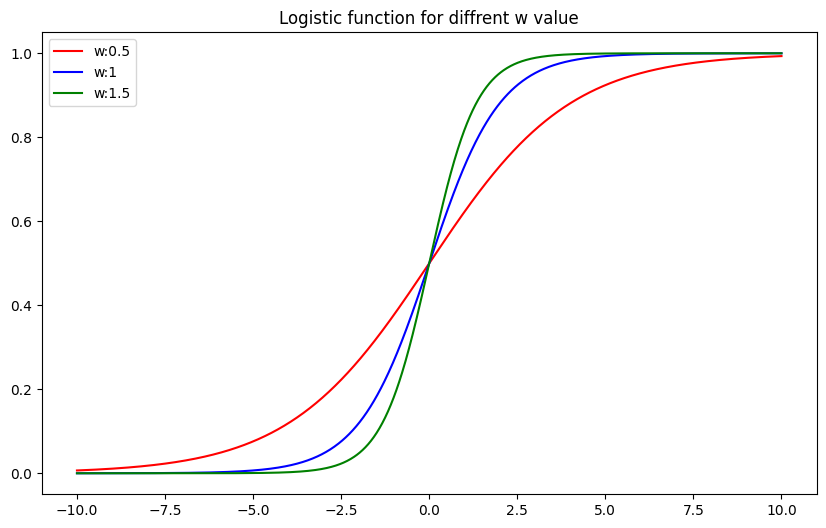

In [34]:
#로지스틱 함수

import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, w, b = 0):
  return 1/(1 + np.exp(-(w*x + b)))

x = np.linspace(-10, 10, 1000)

w_values = [0.5, 1, 1.5]
colors = ['red', 'blue', 'green']

plt.figure(figsize = (10, 6))

for w, color in zip(w_values, colors):
   y = logistic_function(x, w)
   plt.plot(x, y, color = color, label = f'w:{w}')

plt.title('Logistic function for diffrent w value')
plt.legend()
plt.show()